In [108]:
import pandas as pd
import numpy as np
import scipy as sci

In [95]:
year = []
no_smoothing = []
lowess = []
with open('data.txt', 'r') as data:
    lines = data.readlines()
    for line in lines:
        if line[0] == '1' or line[0] == '2':
            new_line = line.split()
            year.append(int(new_line[0]))
            no_smoothing.append(float(new_line[1]))
            lowess.append(float(new_line[2]))

In [96]:
data = pd.DataFrame({'year':year, 'no_smoothing': no_smoothing, 'lowess': lowess})

In [97]:
data

,year,no_smoothing,lowess
0,1880,-0.17,-0.09
1,1881,-0.08,-0.13
2,1882,-0.11,-0.17
3,1883,-0.18,-0.20
4,1884,-0.28,-0.24
...,...,...,...
137,2017,0.92,0.91
138,2018,0.85,0.92
139,2019,0.98,0.93
140,2020,1.01,0.93


In [98]:
ns = data['no_smoothing']

In [99]:
np.mean(ns)

0.053169014084507096

In [100]:
np.median(ns)

-0.065

<Axes: ylabel='Density'>

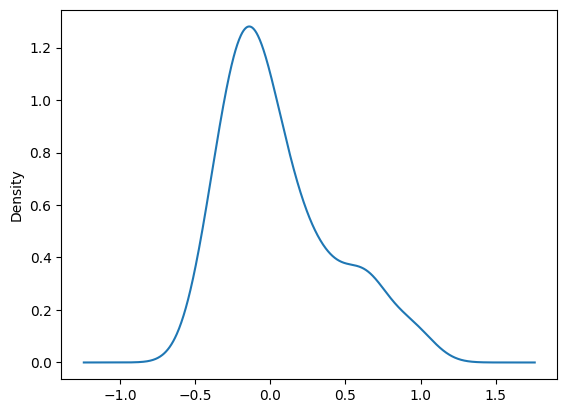

In [101]:
ns.plot(kind= 'density')

In [102]:
# only years before 2000


In [114]:
nineties = data.loc[data['year'] > 1999, 'no_smoothing']

<Axes: ylabel='Density'>

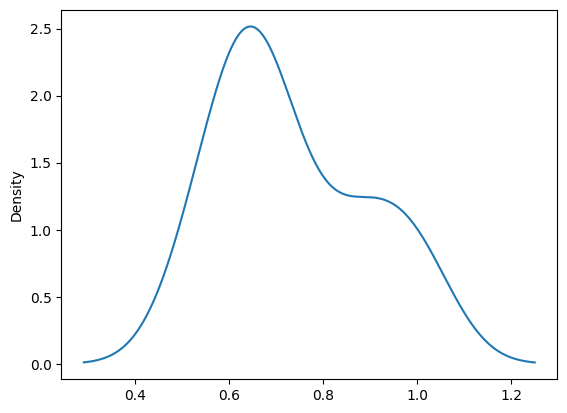

In [104]:
nineties.plot(kind='density')

In [105]:
def normal_dist(df):
    count = 0
    bottom = df.mean() - df.std()
    top = df.mean() + df.std()
    for i in df:
        if bottom < i and i < top:
            count += 1
    return count/len(df)

In [106]:
normal_dist(ns)

0.6971830985915493

In [107]:
normal_dist(nineties)

0.6190476190476191

In [112]:
sci.stats.shapiro(ns).pvalue

4.208129951166484e-07

In [115]:
sci.stats.shapiro(nineties).pvalue

0.22180569171905518